In [129]:
import qiskit as q
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from matplotlib import style
import math
#style.use("dark_background")
%matplotlib inline

qasm_sim = q.Aer.get_backend('qasm_simulator')
statevec_sim = q.Aer.get_backend("statevector_simulator")

In [130]:
#Playground
c = q.QuantumCircuit(2,2)
c.x(0)
c.h(0)
c.ry(math.pi/2,0)
c.x(1)
orig_statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qubit 3, which is impacted by those cnots:
c.draw()

┌───┐┌───┐┌─────────┐┌─┐
q_0: ┤ X ├┤ H ├┤ Ry(π/2) ├┤M├
     ├───┤└┬─┬┘└─────────┘└╥┘
q_1: ┤ X ├─┤M├─────────────╫─
     └───┘ └╥┘             ║ 
c: 2/═══════╩══════════════╩═
            1              0

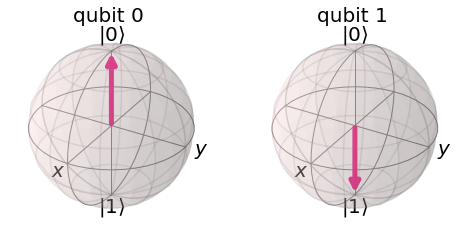

In [131]:
plot_bloch_multivector(orig_statevec)

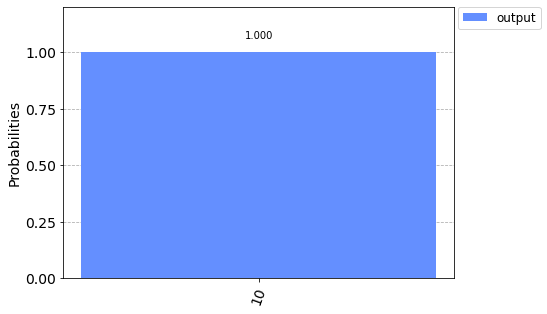

In [132]:
orig_counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=['output'])

In [133]:
#Deustch-Jozsa Algorithm
#Creating the 2 black boxes
def balanced_black_box(c):
    c.cx(0,2)
    c.cx(1,2)
    return c
    
def constant_black_box(c):
    # outputs whatever you put in. 
    return c

In [134]:
#Constant black box
c = q.QuantumCircuit(3,2)
c.h(0)
c.h(1)
c.x(2)
c.h(2)
c.barrier()
c=constant_black_box(c)
c.h(0)
c.h(1)
c.barrier()
c.measure([0,1],[0,1]) #qubit 0 and 1 to cbit 0 and 1
c.draw()

┌───┐      ░ ┌───┐ ░ ┌─┐   
q_0: ┤ H ├──────░─┤ H ├─░─┤M├───
     ├───┤      ░ ├───┤ ░ └╥┘┌─┐
q_1: ┤ H ├──────░─┤ H ├─░──╫─┤M├
     ├───┤┌───┐ ░ └───┘ ░  ║ └╥┘
q_2: ┤ X ├┤ H ├─░───────░──╫──╫─
     └───┘└───┘ ░       ░  ║  ║ 
c: 2/══════════════════════╩══╩═
                           0  1

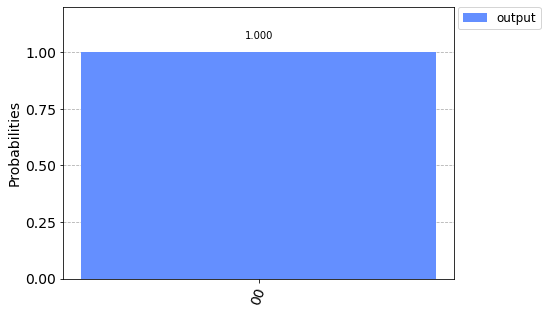

In [135]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output']) ##Probability of getting 00 is 11 (i.e probility of getting 11 is 00). For more info refer: https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html

In [136]:
#Balanced black box
c = q.QuantumCircuit(3,2)
c.h(0)
c.h(1)
c.x(2)
c.h(2)
c.barrier()
c=balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.barrier()
c.measure([0,1],[0,1]) 
c.draw()

┌───┐      ░            ░ ┌───┐ ░ ┌─┐   
q_0: ┤ H ├──────░───■────────░─┤ H ├─░─┤M├───
     ├───┤      ░   │        ░ ├───┤ ░ └╥┘┌─┐
q_1: ┤ H ├──────░───┼────■───░─┤ H ├─░──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐ ░ └───┘ ░  ║ └╥┘
q_2: ┤ X ├┤ H ├─░─┤ X ├┤ X ├─░───────░──╫──╫─
     └───┘└───┘ ░ └───┘└───┘ ░       ░  ║  ║ 
c: 2/═══════════════════════════════════╩══╩═
                                        0  1

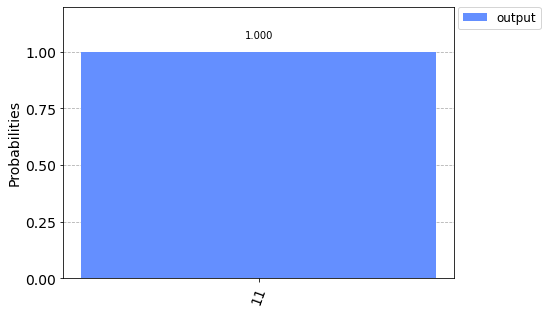

In [137]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output']) ##Probability of getting 00 is 00 (i.e probility of getting 11 is 11) . For more info refer: https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html

In [138]:
#Algorithm to randomize between balanced and constant black boxes
c = q.QuantumCircuit(1,1)
c.h(0)
c.measure(0,0)
c.draw()

┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

In [139]:
ct = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()

In [142]:
c = q.QuantumCircuit(3,2)
c.h(0)
c.h(1)
c.x(2)
c.h(2)
c.barrier()
c=constant_black_box(c) if ct.get('0')>ct.get('1') else balanced_black_box(c) ##constant black box if value of 'ct' is more likely to be 0 else balanced black box
c.barrier()
c.h(0)
c.h(1)
c.barrier()
c.measure([0,1],[0,1]) 
c.draw()

┌───┐      ░            ░ ┌───┐ ░ ┌─┐   
q_0: ┤ H ├──────░───■────────░─┤ H ├─░─┤M├───
     ├───┤      ░   │        ░ ├───┤ ░ └╥┘┌─┐
q_1: ┤ H ├──────░───┼────■───░─┤ H ├─░──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐ ░ └───┘ ░  ║ └╥┘
q_2: ┤ X ├┤ H ├─░─┤ X ├┤ X ├─░───────░──╫──╫─
     └───┘└───┘ ░ └───┘└───┘ ░       ░  ║  ║ 
c: 2/═══════════════════════════════════╩══╩═
                                        0  1

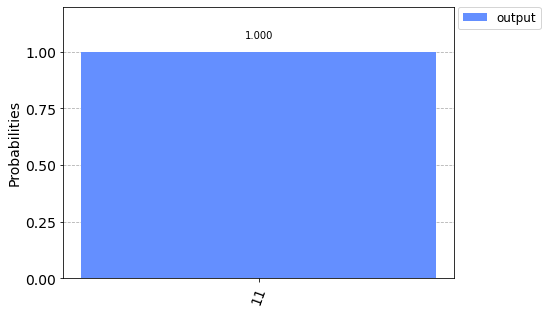

In [143]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output']) ##Probability of getting 00 is 00 (i.e probility of getting 11 is 11) . For more info refer: https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html